In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# 유니코드 마이너스 기호 문제 해결 (한글 폰트 사용 시 필요)
plt.rcParams['axes.unicode_minus'] = False


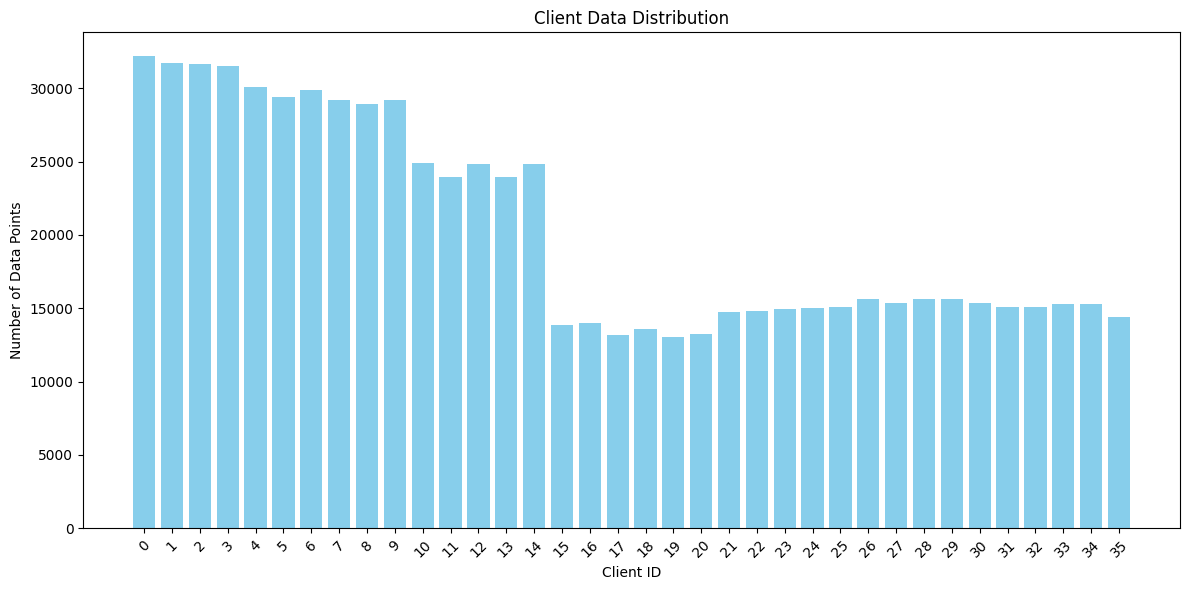

Running FedEM simulation...
Round 1: Performing EM updates and aggregation.
Round 2: Performing EM updates and aggregation.
Round 3: Performing EM updates and aggregation.
Round 4: Performing EM updates and aggregation.
Round 5: Performing EM updates and aggregation.
Round 6: Performing EM updates and aggregation.
Round 7: Performing EM updates and aggregation.
Round 8: Performing EM updates and aggregation.
Round 9: Performing EM updates and aggregation.
Round 10: Performing EM updates and aggregation.
Running SCAFFOLD simulation...
Round 1: Updating local models with control variates.
Round 2: Updating local models with control variates.
Round 3: Updating local models with control variates.
Round 4: Updating local models with control variates.
Round 5: Updating local models with control variates.
Round 6: Updating local models with control variates.
Round 7: Updating local models with control variates.
Round 8: Updating local models with control variates.
Round 9: Updating local mode

In [ ]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np

# 클라이언트 데이터 경로 설정
client_data_paths = [
    f'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_{i}_niid_0_train_9.json'
    for i in range(36)
]

# 클라이언트 데이터 분포 로드 및 시각화 함수
def load_and_visualize_data_distribution(paths):
    client_data_distribution = {}

    for path in paths:
        if os.path.exists(path):
            with open(path, 'r') as file:
                data = json.load(file)
                client_id = os.path.basename(path).split('_')[2]  # 클라이언트 ID 추출
                num_samples = sum([len(data['user_data'][user]['x']) for user in data['user_data']])
                client_data_distribution[client_id] = num_samples

    # 데이터 분포 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(client_data_distribution.keys(), client_data_distribution.values(), color='skyblue')
    plt.xlabel('Client ID')
    plt.ylabel('Number of Data Points')
    plt.title('Client Data Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# FedEM 알고리즘 구현
def fedem_simulation(client_data_paths, num_rounds=10):
    print("Running FedEM simulation...")
    # FedEM의 주요 로직: EM 단계와 통신 프로세스 추가 구현 필요
    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}: Performing EM updates and aggregation.")
        # EM 단계 수행 (예: E-스텝과 M-스텝)
        pass

# SCAFFOLD 알고리즘 구현
def scaffold_simulation(client_data_paths, num_rounds=10):
    print("Running SCAFFOLD simulation...")
    control_variates = {}  # 각 클라이언트의 control variate 초기화
    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}: Updating local models with control variates.")
        # 로컬 업데이트 및 control variate 보정 수행
        pass

# 실행 코드
if __name__ == "__main__":
    # 클라이언트 데이터 분포 시각화
    load_and_visualize_data_distribution(client_data_paths)

    # 알고리즘 비교 시뮬레이션 실행 (FedEM과 SCAFFOLD)
    fedem_simulation(client_data_paths)
    scaffold_simulation(client_data_paths)


C:\Users\ahsld\AppData\Local\Temp\ipykernel_33088\155084966.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


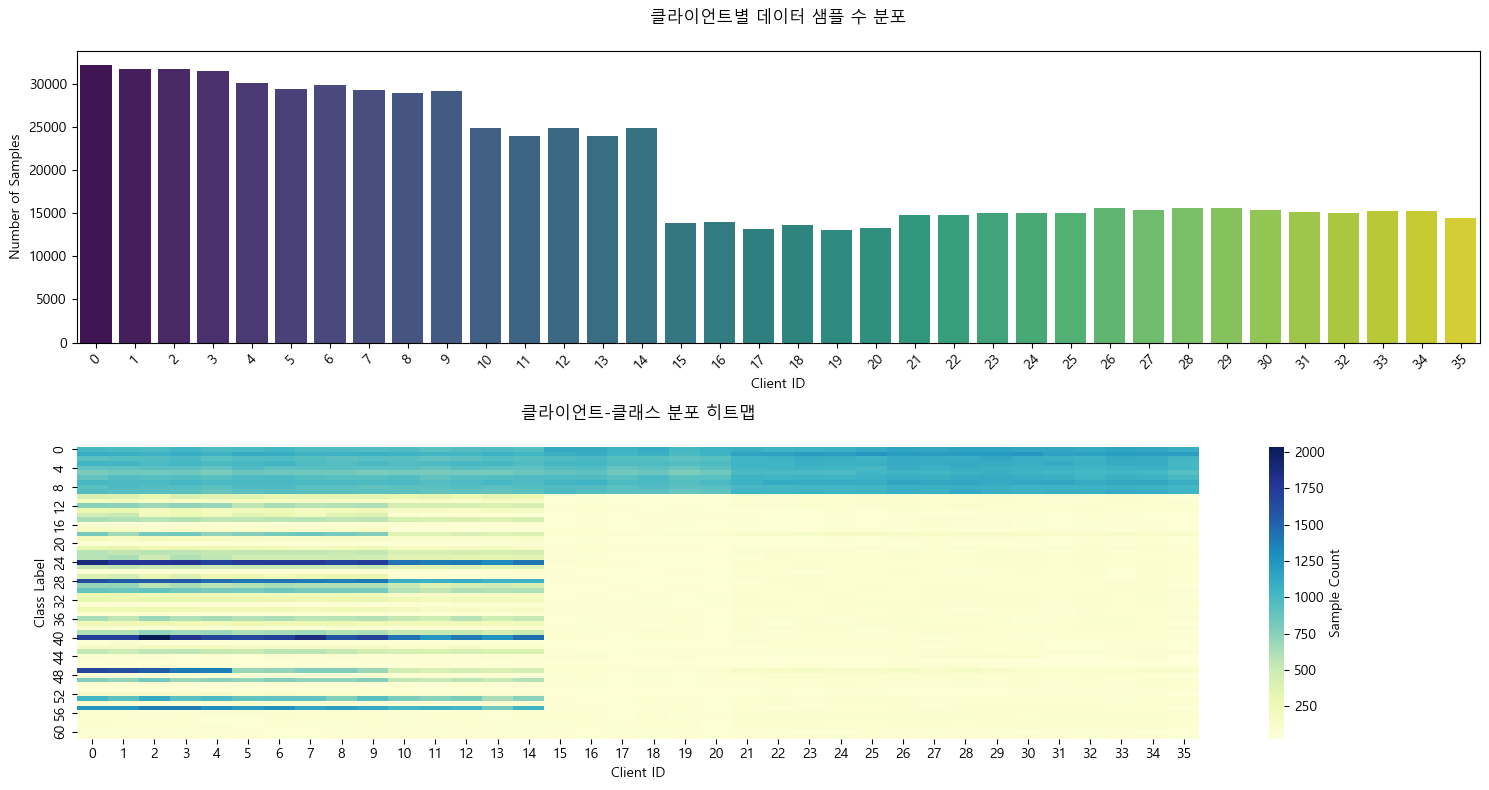

In [8]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

client_data_paths = [
    f'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_{i}_niid_0_train_9.json'
    for i in range(36)
]

def analyze_data_distribution(paths):
    # 클라이언트별 데이터 분석
    client_stats = defaultdict(lambda: {'total': 0, 'class_dist': defaultdict(int)})
    all_classes = set()

    for path in paths:
        with open(path, 'r') as f:
            data = json.load(f)
            client_id = path.split('_')[2]
            
            for user in data['user_data']:
                labels = data['user_data'][user]['y']
                client_stats[client_id]['total'] += len(labels)
                for label in labels:
                    client_stats[client_id]['class_dist'][label] += 1
                    all_classes.add(label)

    # 클래스 분포 데이터프레임 생성
    class_df = pd.DataFrame(
        index=client_stats.keys(),
        columns=sorted(all_classes),
        dtype=float
    ).fillna(0)

    for client, stats in client_stats.items():
        for cls, count in stats['class_dist'].items():
            class_df.loc[client, cls] = count

    return class_df, client_stats

# 시각화 함수
def visualize_distribution(class_df, client_stats):
    plt.figure(figsize=(15, 8))
    
    # 샘플 수 분포 (막대 그래프)
    plt.subplot(2, 1, 1)
    sns.barplot(
        x=list(client_stats.keys()),
        y=[v['total'] for v in client_stats.values()],
        palette="viridis"
    )
    plt.title('클라이언트별 데이터 샘플 수 분포', pad=20)
    plt.xlabel('Client ID')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)

    # 클래스 분포 (히트맵)
    plt.subplot(2, 1, 2)
    sns.heatmap(
        class_df.T,  # 클래스를 행으로 회전
        annot=False,
        cmap="YlGnBu",
        cbar_kws={'label': 'Sample Count'}
    )
    plt.title('클라이언트-클래스 분포 히트맵', pad=20)
    plt.xlabel('Client ID')
    plt.ylabel('Class Label')

    plt.tight_layout()
    plt.show()

# 실행
if __name__ == "__main__":
    class_dist_df, client_stats = analyze_data_distribution(client_data_paths)
    visualize_distribution(class_dist_df, client_stats)


Non-IID Data Statistics:
Label 0: mean=1053.31, std=73.16, min=915, max=1167
Label 1: mean=1118.19, std=72.35, min=989, max=1243
Label 2: mean=1000.36, std=69.59, min=904, max=1130
Label 3: mean=1029.08, std=48.98, min=955, max=1110
Label 4: mean=976.25, std=68.67, min=876, max=1097
Label 5: mean=912.53, std=96.77, min=785, max=1084
Label 6: mean=997.56, std=62.94, min=900, max=1116
Label 7: mean=1044.75, std=64.53, min=947, max=1157
Label 8: mean=986.50, std=55.02, min=904, max=1083
Label 9: mean=984.22, std=75.65, min=879, max=1123
Label 10: mean=186.53, std=129.81, min=61, max=410
Label 11: mean=113.36, std=44.52, min=68, max=201
Label 12: mean=295.19, std=256.46, min=63, max=751
Label 13: mean=132.89, std=72.13, min=65, max=300
Label 14: mean=143.78, std=128.89, min=59, max=521
Label 15: mean=264.06, std=229.02, min=66, max=630
Label 16: mean=73.64, std=5.04, min=65, max=86
Label 17: mean=92.03, std=33.97, min=63, max=192
Label 18: mean=349.00, std=290.30, min=80, max=854
Label 19:

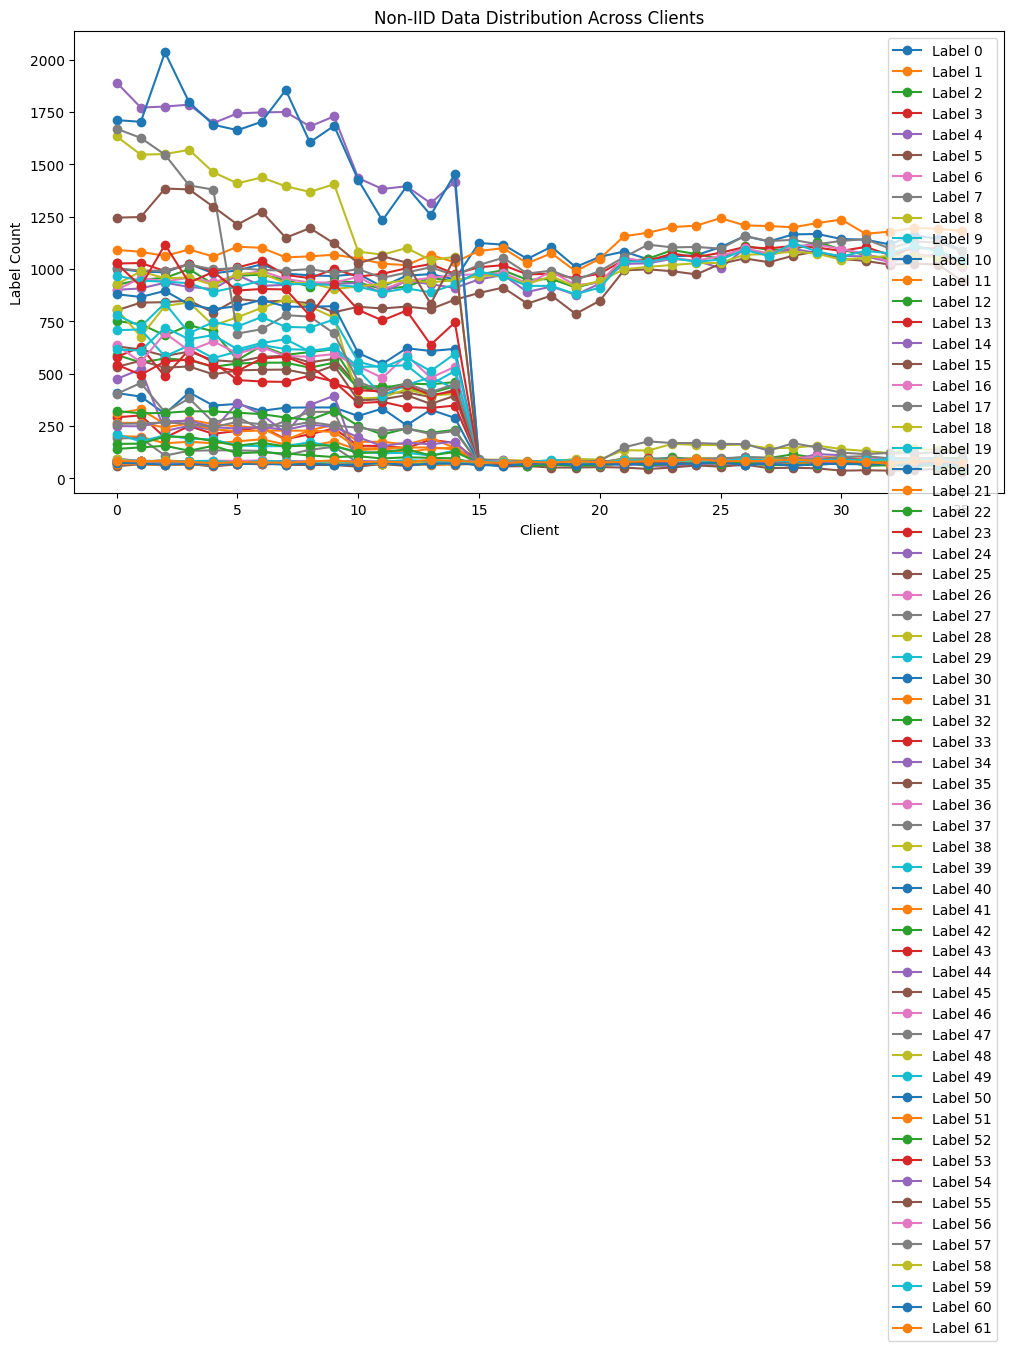

In [5]:

import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from typing import List, Dict

# 데이터 로드 함수
def load_client_data(client_data_paths: List[str]) -> Dict[int, Dict[str, List]]:
    client_data = {}
    for idx, path in enumerate(client_data_paths):
        with open(path, 'r') as f:
            data = json.load(f)
            client_data[idx] = data['user_data']
    return client_data

# Non-IID 데이터 통계 계산 함수
def compute_noniid_statistics(client_data: Dict[int, Dict[str, List]]):
    label_distribution = []
    for client_id, data in client_data.items():
        all_labels = []
        for user in data.values():
            all_labels.extend(user['y'])
        label_distribution.append(Counter(all_labels))
    
    num_clients = len(client_data)
    label_stats = {label: [] for label in set(label for counts in label_distribution for label in counts.keys())}
    
    for counts in label_distribution:
        for label in label_stats.keys():
            label_stats[label].append(counts.get(label, 0))
    
    print("Non-IID Data Statistics:")
    for label, counts in label_stats.items():
        print(f"Label {label}: mean={np.mean(counts):.2f}, std={np.std(counts):.2f}, min={min(counts)}, max={max(counts)}")
    
    # 시각화
    fig, ax = plt.subplots(figsize=(12, 6))
    for label, counts in label_stats.items():
        ax.plot(range(num_clients), counts, marker='o', label=f'Label {label}')
    
    ax.set_xlabel('Client')
    ax.set_ylabel('Label Count')
    ax.set_title('Non-IID Data Distribution Across Clients')
    ax.legend()
    plt.show()

# 실행 예시
client_data_paths = [
    f'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_{i}_niid_0_train_9.json'
    for i in range(36)
]

client_data = load_client_data(client_data_paths)
compute_noniid_statistics(client_data)
